In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [8]:
from datetime import datetime
from config import weather_api_key
import requests

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=" + weather_api_key

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
url_test = url + "&q=Boston"

In [20]:
city_weather = requests.get(url_test).json()
city_weather['weather'][0]['description']

'scattered clouds'

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | port keats
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | kazanskoye
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | deputatskiy
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | ketchikan
Processing Record 16 of Set 1 | kodinsk
Processing Record 17 of Set 1 | urumqi
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | luau
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | vestmanna
Processing Record 24 of Set 1 | lom

Processing Record 39 of Set 4 | impfondo
Processing Record 40 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 4 | verkhoyansk
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | yankton
Processing Record 44 of Set 4 | ibotirama
Processing Record 45 of Set 4 | richards bay
Processing Record 46 of Set 4 | rafsanjan
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | luchegorsk
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | saint-jean-port-joli
Processing Record 1 of Set 5 | isoka
Processing Record 2 of Set 5 | san-pedro
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | shunyi
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | chapais
Processing Record 8 of Set 5 | quballat
Processing Record 9 of Set 5 | atuona
Processing Record 10 of Set 5 | haines junction
Processing Record 11 of Set 5 | marilandia
Processing Recor

Processing Record 28 of Set 8 | victor harbor
Processing Record 29 of Set 8 | jerome
Processing Record 30 of Set 8 | thinadhoo
Processing Record 31 of Set 8 | nelson bay
Processing Record 32 of Set 8 | merauke
Processing Record 33 of Set 8 | reisterstown
Processing Record 34 of Set 8 | haibowan
City not found. Skipping...
Processing Record 35 of Set 8 | bereda
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | tongsa
City not found. Skipping...
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | vertou
Processing Record 41 of Set 8 | yaan
Processing Record 42 of Set 8 | valkeala
Processing Record 43 of Set 8 | rudsar
Processing Record 44 of Set 8 | kyra
Processing Record 45 of Set 8 | saint anthony
Processing Record 46 of Set 8 | bengkulu
Processing Record 47 of Set 8 | pemangkat
Processing Record 48 of Set 8 | pafos
Processing Record 49 of Set 8 | pokhara
Processing Record 50 of Set 8 | kilakarai
Pro

Processing Record 16 of Set 12 | geraldton
Processing Record 17 of Set 12 | stonewall
Processing Record 18 of Set 12 | mionica
Processing Record 19 of Set 12 | tessalit
Processing Record 20 of Set 12 | russell
Processing Record 21 of Set 12 | talnakh
Processing Record 22 of Set 12 | anito
Processing Record 23 of Set 12 | daru
Processing Record 24 of Set 12 | trinidad
Processing Record 25 of Set 12 | yima
Processing Record 26 of Set 12 | whitehorse
Processing Record 27 of Set 12 | jadu
Processing Record 28 of Set 12 | xian
Processing Record 29 of Set 12 | terrace
Processing Record 30 of Set 12 | kulhudhuffushi
Processing Record 31 of Set 12 | ust-nera
Processing Record 32 of Set 12 | tacoma
Processing Record 33 of Set 12 | yerbogachen
Processing Record 34 of Set 12 | dawei
Processing Record 35 of Set 12 | gat
Processing Record 36 of Set 12 | baoning
Processing Record 37 of Set 12 | yuanping
Processing Record 38 of Set 12 | camargo
Processing Record 39 of Set 12 | ginir
Processing Record

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,28.96,67,85,1.77,GL,2021-05-22 17:06:25
1,Port Alfred,-33.5906,26.8910,58.87,57,1,5.82,ZA,2021-05-22 17:06:26
2,Mount Gambier,-37.8333,140.7667,49.96,57,77,7.45,AU,2021-05-22 17:06:26
3,Mataura,-46.1927,168.8643,37.80,96,0,1.95,NZ,2021-05-22 17:06:26
4,Port Keats,-14.2500,129.5500,73.02,67,77,2.13,AU,2021-05-22 17:06:26
5,Faanui,-16.4833,-151.7500,80.80,73,41,14.09,PF,2021-05-22 17:06:27
6,Chuy,-33.6971,-53.4616,61.43,70,56,17.34,UY,2021-05-22 17:06:27
7,Hilo,19.7297,-155.0900,71.33,87,90,5.75,US,2021-05-22 17:05:57
8,Barrow,71.2906,-156.7887,32.02,86,90,12.66,US,2021-05-22 17:06:27
9,Kazanskoye,55.6448,69.2350,68.83,55,65,6.33,RU,2021-05-22 17:06:27


In [19]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-05-22 17:06:25,77.4840,-69.3632,28.96,67,85,1.77
1,Port Alfred,ZA,2021-05-22 17:06:26,-33.5906,26.8910,58.87,57,1,5.82
2,Mount Gambier,AU,2021-05-22 17:06:26,-37.8333,140.7667,49.96,57,77,7.45
3,Mataura,NZ,2021-05-22 17:06:26,-46.1927,168.8643,37.80,96,0,1.95
4,Port Keats,AU,2021-05-22 17:06:26,-14.2500,129.5500,73.02,67,77,2.13


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# get city data for plotting

lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

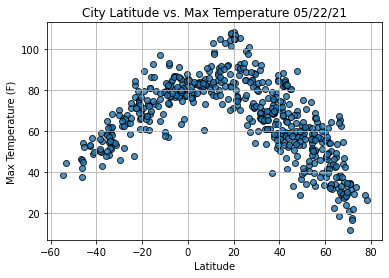

In [22]:
import time

#scatter plot of latitude vs max temp
plt.scatter(lats,max_temp, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

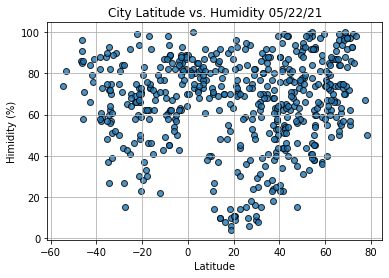

In [23]:
import time

#scatter plot of latitude vs max temp
plt.scatter(lats,humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Himidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

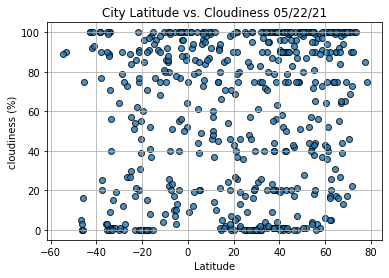

In [24]:
import time

#scatter plot of latitude vs max temp
plt.scatter(lats,cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

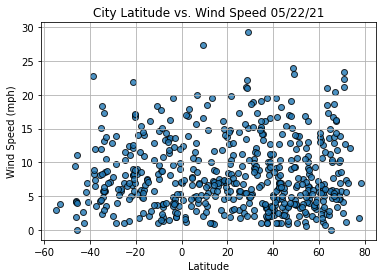

In [25]:
import time

#scatter plot of latitude vs max temp
plt.scatter(lats,wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2021-05-22 17:06:28
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    82.36
Humidity                       82
Cloudiness                     88
Wind Speed                   8.99
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
539     True
540     True
541     True
542    False
543     True
Name: Lat, Length: 544, dtype: bool

In [43]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [44]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

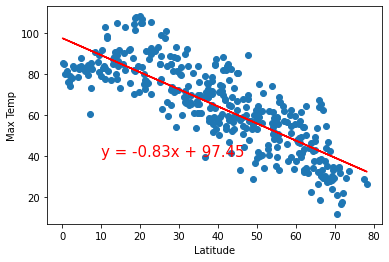

In [45]:
# linear r egression on Nothern Hemi

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function

plot_linear_regression(x_values, y_values, "Linear Regression on Norther Hemisphere for mmax Temp", "Max Temp", (10,40))

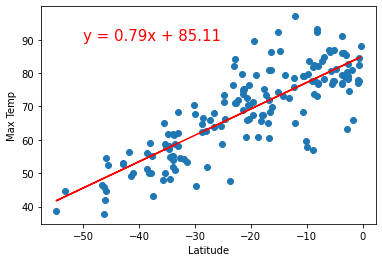

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


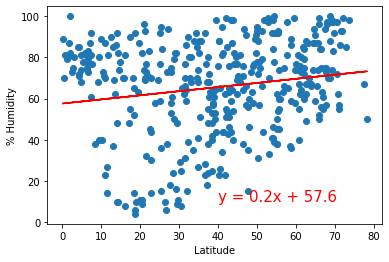

In [47]:
# linear r egression on Nothern Hemi

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function

plot_linear_regression(x_values, y_values, "Linear Regression on Norther Hemisphere for % Humidity", "% Humidity", (40,10))

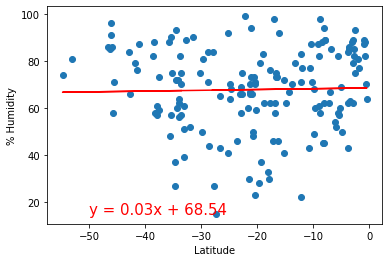

In [49]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

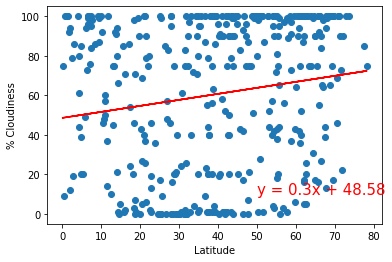

In [54]:
# linear r egression on Nothern Hemi

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function

plot_linear_regression(x_values, y_values, "Linear Regression on Norther Hemisphere for % Cloudiness", "% Cloudiness", (50,10))

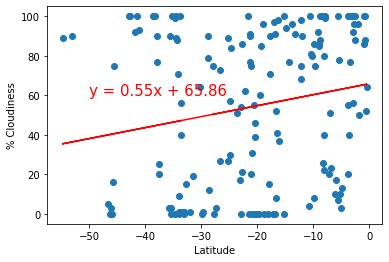

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

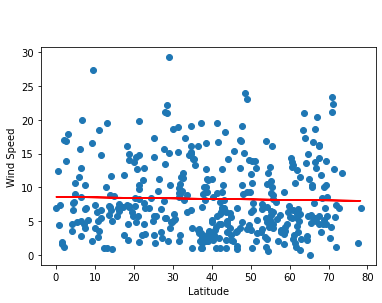

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

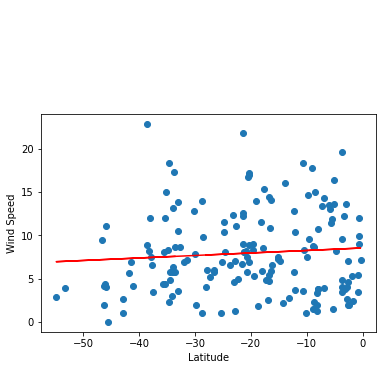

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))